# **1. Sumber Data**


Dataset yang digunakan merupakan dataset kualitas air yang layak dan tidak layak untuk dikonsumsi. Data ini bersumber dari Kaggle, tepatnya pada [halaman ini](https://www.kaggle.com/datasets/adityakadiwal/water-potability).

Akses terhadap air minum yang aman sangat penting bagi kesehatan, hak asasi manusia yang mendasar, dan komponen kebijakan yang efektif untuk perlindungan kesehatan. Hal ini penting sebagai isu kesehatan dan pembangunan di tingkat nasional, regional, dan lokal. Di beberapa wilayah, telah terbukti bahwa investasi dalam penyediaan air dan sanitasi dapat menghasilkan manfaat ekonomi bersih, karena pengurangan dampak kesehatan yang merugikan dan biaya perawatan kesehatan lebih besar daripada biaya untuk melakukan intervensi.

# **2. Import Library**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import joblib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report

# **3. Memuat Dataset**

## Tampilkan Data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Sulbae/SMSML_Anggun-Sulis-Setyawan/refs/heads/main/water_potability.csv')

df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Deskripsi Fitur

| No | Nama | Tipe Data | Deskripsi |
|----|------|-----------|-----------|
| 1 | pH | float64 | PH merupakan parameter penting dalam mengevaluasi keseimbangan asam-basa air. PH juga merupakan indikator status air yang bersifat asam atau basa. WHO telah merekomendasikan batas pH maksimum yang diizinkan dari 6,5 hingga 8,5. Kisaran pH yang diteliti saat ini adalah 6,52–6,83 yang berada dalam kisaran standar WHO. |
| 2 | Hardness | float64 | Kesadahan terutama disebabkan oleh garam kalsium dan magnesium. Garam-garam ini terlarut dari endapan geologis yang dilalui air. Lamanya waktu air bersentuhan dengan bahan yang menghasilkan kesadahan membantu menentukan seberapa banyak kesadahan yang ada dalam air mentah. Kesadahan awalnya didefinisikan sebagai kapasitas air untuk mengendapkan sabun yang disebabkan oleh Kalsium dan Magnesium. |
| 3 | Solids (Total Dissolved Solids - TDS) | float64 | Air memiliki kemampuan untuk melarutkan berbagai macam mineral atau garam anorganik dan beberapa mineral atau garam organik seperti kalium, kalsium, natrium, bikarbonat, klorida, magnesium, sulfat, dll. Mineral-mineral ini menghasilkan rasa yang tidak diinginkan dan warna yang encer pada air. Ini adalah parameter penting untuk penggunaan air. Air dengan nilai TDS yang tinggi menunjukkan bahwa air tersebut sangat bermineral. Batas yang diinginkan untuk TDS adalah 500 mg/l dan batas maksimum adalah 1000 mg/l yang ditentukan untuk tujuan minum. |
| 4 | Chloramines | float64 | Klorin dan kloramina merupakan disinfektan utama yang digunakan dalam sistem air publik. Kloramina paling sering terbentuk ketika amonia ditambahkan ke klorin untuk mengolah air minum. Kadar klorin hingga 4 miligram per liter (mg/L atau 4 bagian per juta (ppm)) dianggap aman dalam air minum. |
| 5 | Sulfate | float64 | Sulfat adalah zat alami yang ditemukan dalam mineral, tanah, dan bebatuan. Zat ini terdapat di udara sekitar, air tanah, tanaman, dan makanan. Penggunaan utama sulfat secara komersial adalah dalam industri kimia. Konsentrasi sulfat dalam air laut sekitar 2.700 miligram per liter (mg/L). Konsentrasinya berkisar antara 3 hingga 30 mg/L dalam sebagian besar persediaan air tawar, meskipun konsentrasi yang jauh lebih tinggi (1000 mg/L) ditemukan di beberapa lokasi geografis. |
| 6 | Conductivity | float64 | Air murni bukanlah konduktor arus listrik yang baik, melainkan isolator yang baik. Peningkatan konsentrasi ion meningkatkan konduktivitas listrik air. Secara umum, jumlah padatan terlarut dalam air menentukan konduktivitas listrik. Konduktivitas listrik (EC) sebenarnya mengukur proses ionik suatu larutan yang memungkinkannya mengalirkan arus. Menurut standar WHO, nilai EC tidak boleh melebihi 400 μS/cm. |
| 7 | Organic Carbon | float64 | Total Organic Carbon (TOC) di sumber air berasal dari bahan organik alami (NOM) yang membusuk serta sumber sintetis. TOC adalah ukuran jumlah total karbon dalam senyawa organik dalam air murni. Menurut US EPA < 2 mg/L sebagai TOC dalam air olahan/air minum, dan < 4 mg/Lit dalam sumber air yang digunakan untuk pengolahan. |
| 8 | Trihalomethanes | float64 | THM adalah zat kimia yang dapat ditemukan dalam air yang diolah dengan klorin. Konsentrasi THM dalam air minum bervariasi menurut tingkat bahan organik dalam air, jumlah klorin yang dibutuhkan untuk mengolah air, dan suhu air yang diolah. Kadar THM hingga 80 ppm dianggap aman dalam air minum. |
| 9 | Turbidity | float64 | Kekeruhan air bergantung pada kuantitas zat padat yang ada dalam keadaan tersuspensi. Kekeruhan merupakan ukuran sifat air yang memancarkan cahaya dan pengujian ini digunakan untuk menunjukkan kualitas pembuangan limbah terhadap zat koloid. Nilai kekeruhan rata-rata yang diperoleh untuk Kampus Wondo Genet (0,98 NTU) lebih rendah dari nilai yang direkomendasikan WHO yaitu 5,00 NTU. |
| 10 | Potability | int64 | Menunjukkan apakah air aman untuk dikonsumsi manusia, di mana 1 berarti Layak Minum dan 0 berarti Tidak Layak Minum. |

## Deskripsi Statistik

In [8]:
df.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

## Data Assesment

### Cek Missing Value

In [67]:
missing_values = df.isnull().sum().sum()

if missing_values > 0:
    print("Missing Values:\n", df.isnull().sum())
else:
    print("Tidak ada Missing Values")

Missing Values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


* `491` nilai pH hilang
* `781` nilai Sulfate hilang
* `162` nilai Trihalomethanes hilang

Untuk mempertahankan jumlah data, maka penanganan missing value ini akan dilakukan dengan cara imputasi nilai rata-rata tiap variabel.

### Cek Duplikasi Data

In [65]:
duplikasi = df.duplicated().sum()

if duplikasi > 0:
    print(f"Terdapat {duplikasi} duplikasi data")
else:
    print("Tidak ada duplikasi data")

Tidak ada duplikasi data


# **4. Exploratory Data Analysis (EDA)**

## Kondisi Data Awal

### Cek Outlier

In [82]:
def boxplot_outlier(df):
    view_outlier = plt.figure(figsize=(20,15))
    axes = []

    for k, cols in enumerate(df):
        ax = plt.subplot(4, 3, k+1)
        sns.boxplot(x=cols, data=df, color="#264D58", ax=ax)
        ax.set_title(f"Check Outliers - {cols}", fontsize=12)
        axes.append(ax)
    
    plt.tight_layout(pad=3.0)
    return view_outlier, axes

(<Figure size 2000x1500 with 10 Axes>,
 [<Axes: title={'center': 'Check Outliers - ph'}, xlabel='ph'>,
  <Axes: title={'center': 'Check Outliers - Hardness'}, xlabel='Hardness'>,
  <Axes: title={'center': 'Check Outliers - Solids'}, xlabel='Solids'>,
  <Axes: title={'center': 'Check Outliers - Chloramines'}, xlabel='Chloramines'>,
  <Axes: title={'center': 'Check Outliers - Sulfate'}, xlabel='Sulfate'>,
  <Axes: title={'center': 'Check Outliers - Conductivity'}, xlabel='Conductivity'>,
  <Axes: title={'center': 'Check Outliers - Organic_carbon'}, xlabel='Organic_carbon'>,
  <Axes: title={'center': 'Check Outliers - Trihalomethanes'}, xlabel='Trihalomethanes'>,
  <Axes: title={'center': 'Check Outliers - Turbidity'}, xlabel='Turbidity'>,
  <Axes: title={'center': 'Check Outliers - Potability'}, xlabel='Potability'>])

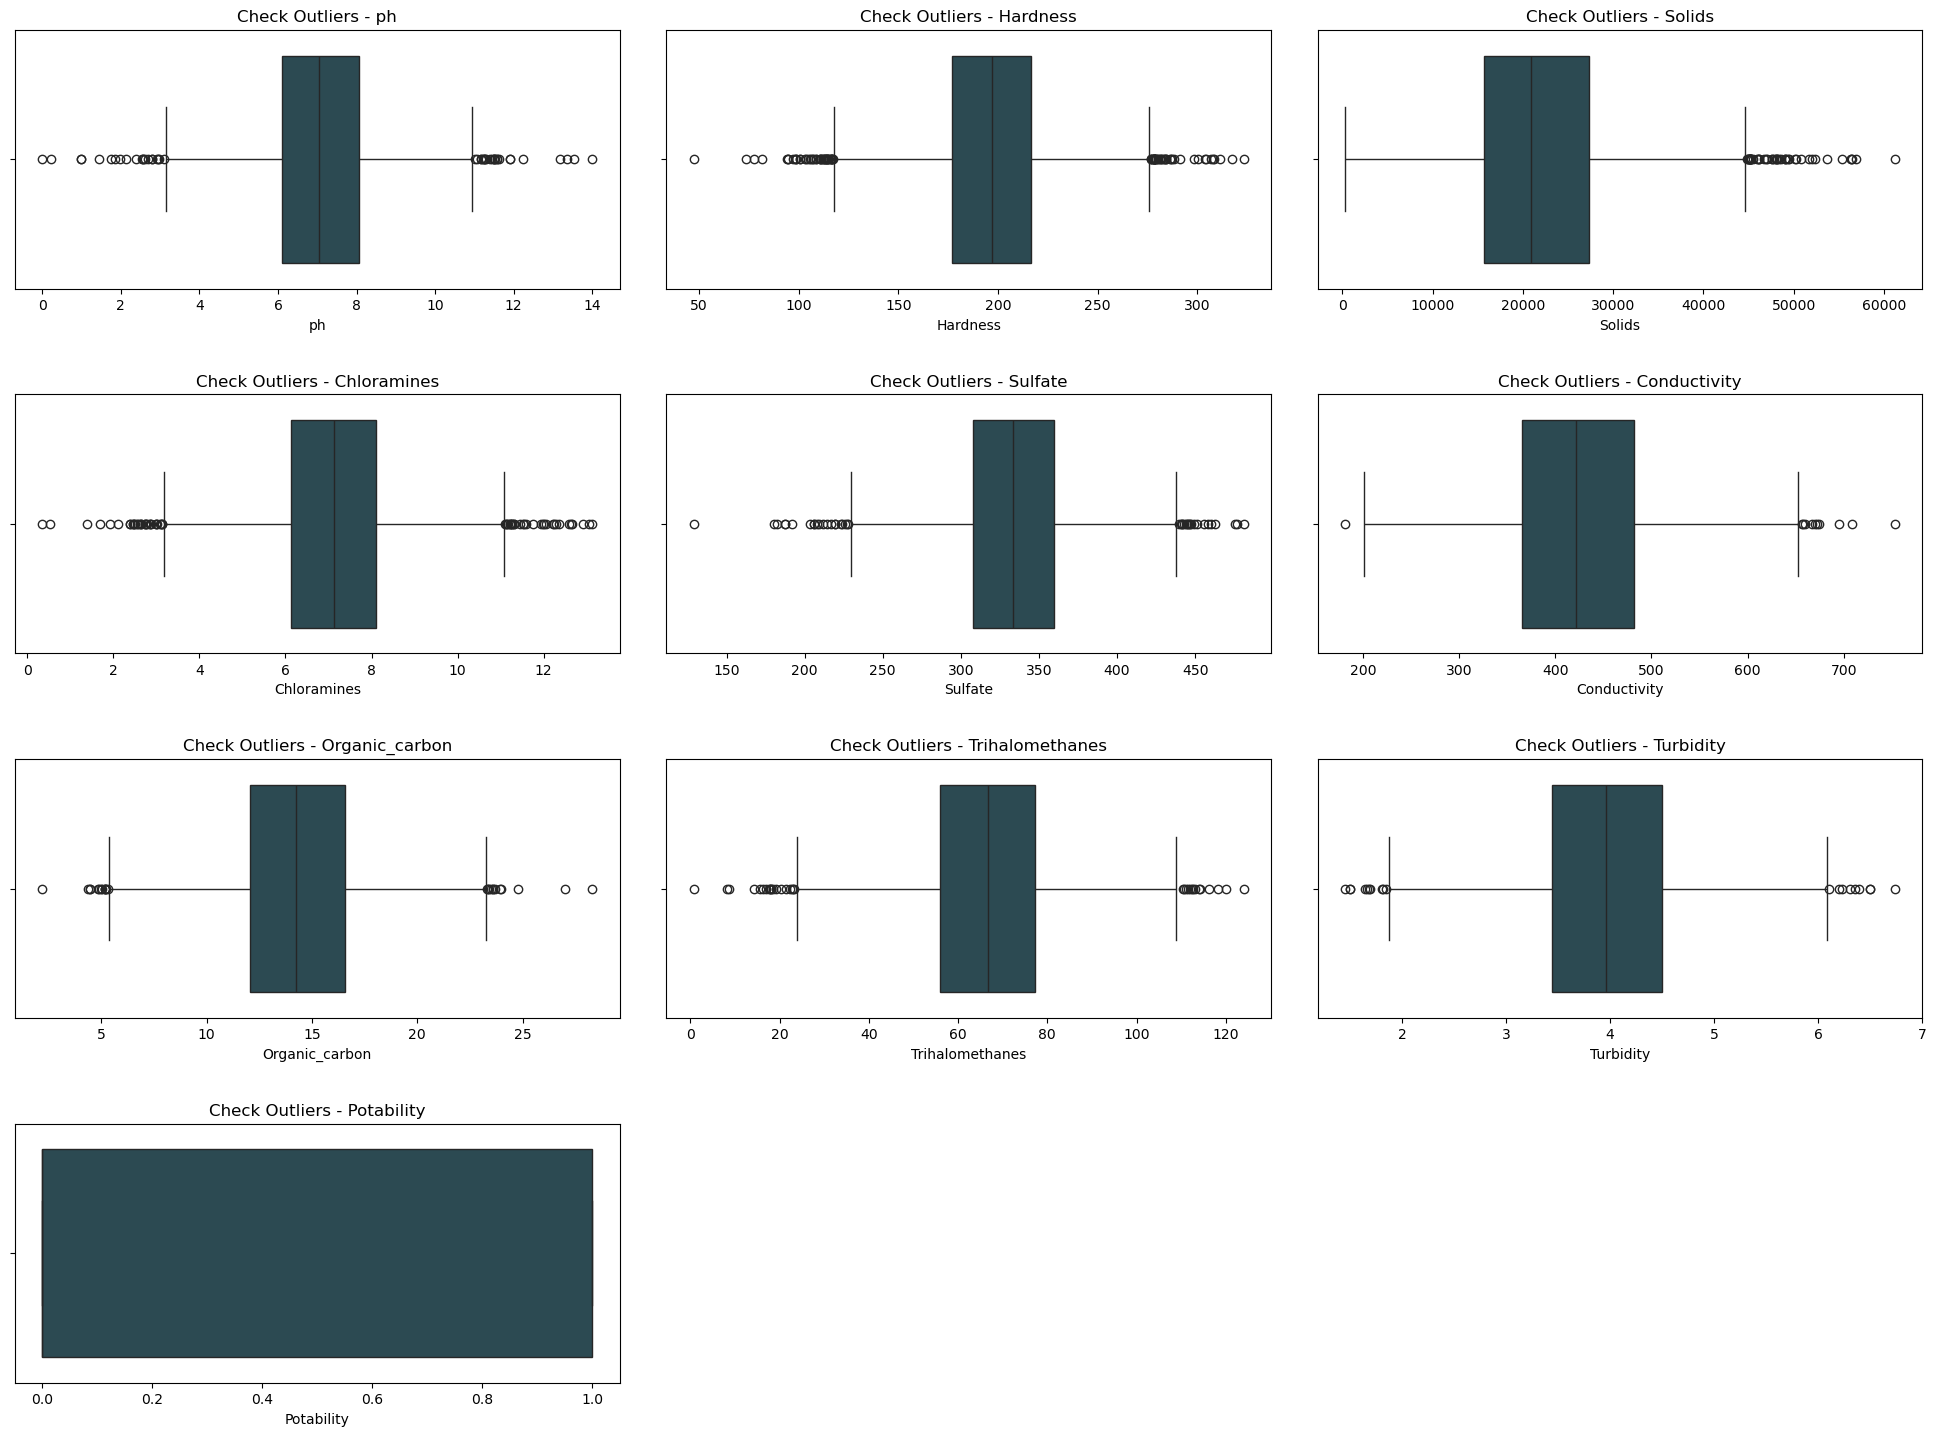

In [83]:
boxplot_outlier(df)

### Cek Distribusi Data

In [ ]:
def hisplot(df):
    view_outlier = plt.figure(figsize=(20,15))
    axes = []

    for k, cols in enumerate(df):
        ax = plt.subplot(4, 3, k+1)
        sns.boxplot(x=cols, data=df, color="#264D58", ax=ax)
        ax.set_title(f"Check Outliers - {cols}", fontsize=12)
        axes.append(ax)
    
    plt.tight_layout(pad=3.0)
    return view_outlier, axes

### Cek Korelasi Data

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.